In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
alpha = 0.1  # Параметр насыщения
gamma = 0.1  # Параметр роста жертв

# Определяем систему уравнений
def system(X):
    x, y = X
    dxdt = x - (x / (1 + x)) * y - alpha * x**2
    dydt = -y + (x / (1 + x)) * y
    return np.array([dxdt, dydt])

# Находим точки покоя
def equilibrium_points():
    # Решение уравнений dx/dt = 0 и dy/dt = 0
    # x - (x/(1+x))*y - alpha*x^2 = 0
    # -y + (x/(1+x))*y = 0
    # Из второго уравнения: y = 0 или x/(1+x) = 1 -> x -> бесконечность
    # Если y = 0, то из первого: x = 0 (точка покоя (0, 0))

    # Для y > 0: x/(1+x) = 1 -> x -> бесконечность (не рассматриваем)
    return np.array([[0, 0], [1, gamma / alpha]])


# Исследуем устойчивость в точках покоя
def stability_analysis(eq_points):
    for point in eq_points:
        x_eq, y_eq = point

        # Якобиан
        J = np.array([[1 - (y_eq / (1 + x_eq)) + (x_eq * y_eq / (1 + x_eq)**2) - 2 * alpha * x_eq, -(x_eq / (1 + x_eq))],
            [(y_eq / (1 + x_eq)), -(1 - (x_eq / (1 + x_eq)))],])

        eigenvalues = np.linalg.eigvals(J)
        print(f"Точка покоя: {point}, Собственные значения: {eigenvalues}")

In [5]:
# Построение фазового портрета
def phase_portrait():
    x_vals = np.linspace(0, 10, 20)
    y_vals = np.linspace(0, 10, 20)
    X, Y = np.meshgrid(x_vals, y_vals)

    DX, DY = np.zeros(X.shape), np.zeros(Y.shape)

    for i in range(len(x_vals)):
        for j in range(len(y_vals)):
            dX = system([X[i, j], Y[i, j]])
            DX[i, j] = dX[0]
            DY[i, j] = dX[1]

    plt.figure(figsize=(10, 8))
    plt.quiver(X, Y, DX, DY, color='r')
    plt.xlim(0, 10)
    plt.ylim(0, 10)

    # Точки покоя
    eq_points = equilibrium_points()
    plt.scatter(eq_points[:, 0], eq_points[:, 1], color='blue', label='Точки покоя')

    plt.title("Фазовый портрет модели 'хищник-жертва'")
    plt.xlabel("Численность жертв (x)")
    plt.ylabel("Численность хищников (y)")
    plt.legend()
    plt.grid()
    plt.show()

Точка покоя: [0. 0.], Собственные значения: [ 1. -1.]
Точка покоя: [1. 1.], Собственные значения: [ 0.18507811 -0.13507811]


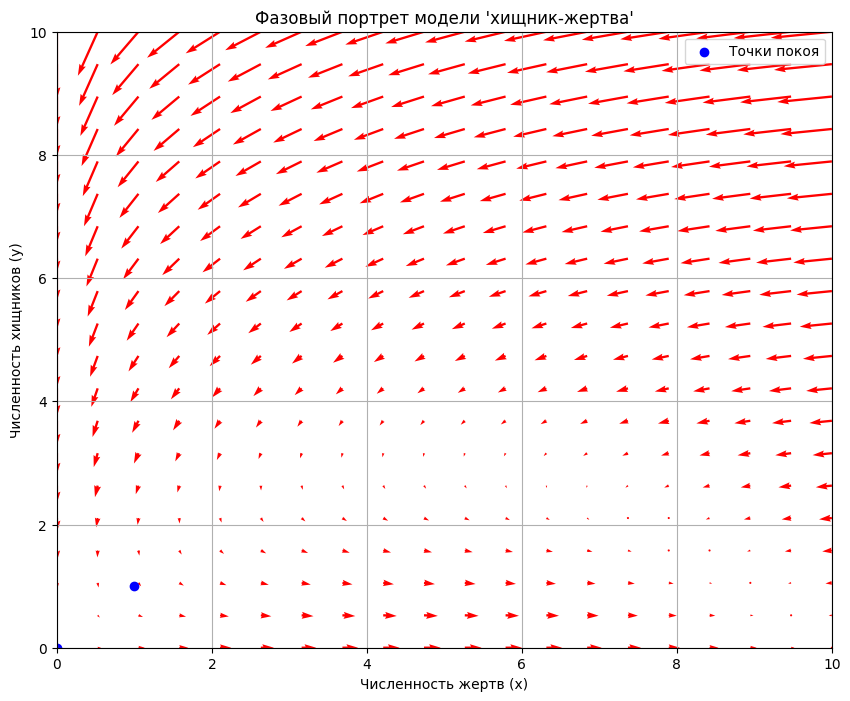

In [6]:
eq_points = equilibrium_points()
stability_analysis(eq_points)
phase_portrait()